In [1]:
import numpy as np
# import seaborn as sns 
import matplotlib.pyplot as plt

from importlib import reload
import utils.misc as mutil
reload(mutil);

In [2]:
MEDIUM_SIZE = 10
BIG_SIZE = 11
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
sweep_results_folder = './results/regret-sweep'
arrival_rate_list = [2, 4, 6]
noise_variance_list = [0, 0.01, 0.05, 0.1] 
show_theoretical = [0, 0, 0, 1]
plot_style = ['-x', '-o', '-s', '-^']

Fit co-effs [1 T^{2/3}] = [1821.795    8.052]
Fit co-effs [1 T^{2/3}] = [1171.131    8.997]
Fit co-effs [1 T^{2/3}] = [1640.226    6.646]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


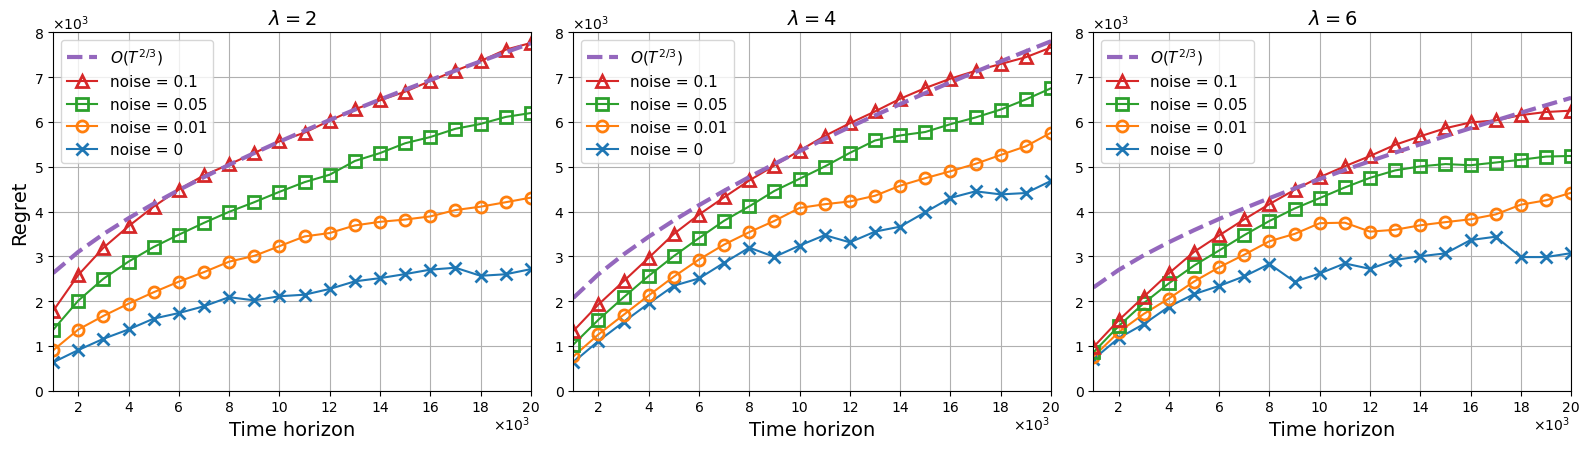

In [4]:
# plt.rcParams["mathtext.fontset"] = 'cm'
# plt.rcParams["font.family"] =  "Times New Roman"
fig, axs = plt.subplots(nrows=1, ncols=len(arrival_rate_list), figsize=(16, 4.6))
for ii, arrival_rate in enumerate(arrival_rate_list):
    ax = axs[ii]
    for jj, noise_variance in enumerate(noise_variance_list):
        current_result = np.load(sweep_results_folder + '/regret-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')     
        ax.plot(current_result[0,:], current_result[1,:] - current_result[2,:], plot_style[jj], label = 'noise = ' + str(noise_variance), fillstyle = 'none', markeredgewidth=2, ms=8)  

        if(show_theoretical[jj]):
            theoretical_regret = mutil.fit_regret_curve(current_result[0,:], current_result[1,:] - current_result[2,:], start_index = 6)
            ax.plot(current_result[0,:], theoretical_regret, '--', label = '$O(T^{2/3})$', linewidth=3)

    ax.set_title('$\lambda = ' + str(arrival_rate) + '$')

    if(ii == 0): ax.set_ylabel('Regret')
    ax.set_xlabel('Time horizon')
    
    ax.set_ylim([0,8000])
    ax.set_xlim([1000,20000])

    # ax.ticklabel_format(axis='x', style='sci', scilimits=(0,4), useMathText=True)
    ax.set_xticks(ticks=2000*np.arange(1,11), labels=['{:1.0f}'.format(s) for s in 2*np.arange(1,11)])
    ax.text(18500, -869, '$\\times 10^3$')
    
    # ax.ticklabel_format(axis='y', style='sci', scilimits=(0,2), useMathText=True)
    ax.set_yticks(ticks=1000*np.arange(0,9), labels=['{:1.0f}'.format(s) for s in np.arange(0,9)])
    ax.text(960, 8069, '$\\times 10^3$')
    
    handles, labels = ax.get_legend_handles_labels()
    order = [0,1,2,3,4]
    order.reverse()
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')
    
    ax.grid()

plt.tight_layout()
plt.savefig('./results/figs/regret-plots.eps', bbox_inches='tight')
plt.show()

In [5]:
sweep_results_folder = './results/regret-sweep'
arrival_rate_list = [2, 4, 6]
noise_variance_list = [0, 0.01, 0.05, 0.1] 
show_theoretical = [0, 0, 0, 1]
plot_style = ['-x', '-o', '-s', '-^']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Fit co-effs [1 T^{2/3}] = [1821.795    8.052]


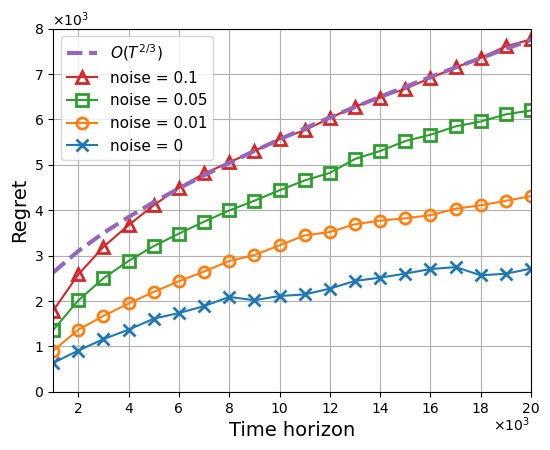

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Fit co-effs [1 T^{2/3}] = [1171.131    8.997]


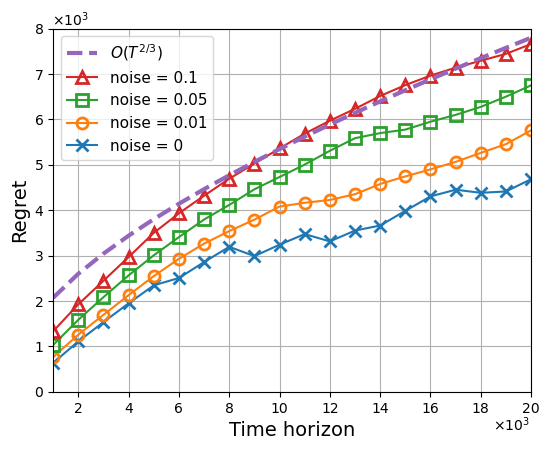

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Fit co-effs [1 T^{2/3}] = [1640.226    6.646]


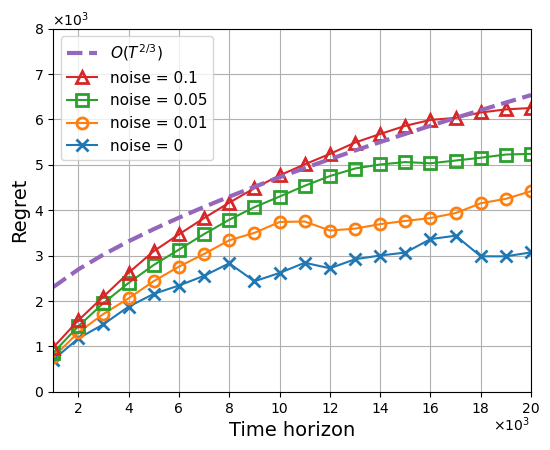

In [6]:
# plt.rcParams["mathtext.fontset"] = 'cm'
# plt.rcParams["font.family"] =  "Times New Roman"
for ii, arrival_rate in enumerate(arrival_rate_list):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.6, 4.6))

    for jj, noise_variance in enumerate(noise_variance_list):
        current_result = np.load(sweep_results_folder + '/regret-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')     
        ax.plot(current_result[0,:], current_result[1,:] - current_result[2,:], plot_style[jj], label = 'noise = ' + str(noise_variance), fillstyle = 'none', markeredgewidth=2, ms=8)  

        if(show_theoretical[jj]):
            theoretical_regret = mutil.fit_regret_curve(current_result[0,:], current_result[1,:] - current_result[2,:], start_index = 6)
            ax.plot(current_result[0,:], theoretical_regret, '--', label = '$O(T^{2/3})$', linewidth=3)

    ax.set_ylabel('Regret')
    ax.set_xlabel('Time horizon')
    
    ax.set_ylim([0,8000])
    ax.set_xlim([1000,20000])

    # ax.ticklabel_format(axis='x', style='sci', scilimits=(0,4), useMathText=True)
    ax.set_xticks(ticks=2000*np.arange(1,11), labels=['{:1.0f}'.format(s) for s in 2*np.arange(1,11)])
    ax.text(18500, -869, '$\\times 10^3$')
    
    # ax.ticklabel_format(axis='y', style='sci', scilimits=(0,2), useMathText=True)
    ax.set_yticks(ticks=1000*np.arange(0,9), labels=['{:1.0f}'.format(s) for s in np.arange(0,9)])
    ax.text(960, 8069, '$\\times 10^3$')
    
    handles, labels = ax.get_legend_handles_labels()
    order = [0,1,2,3,4]
    order.reverse()
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')
    
    ax.grid()

    plt.tight_layout()
    plt.savefig('./results/figs/regret-plots-lambda-' + str(arrival_rate).replace('.','_') + '.eps', bbox_inches='tight')
    plt.show()

In [7]:
run_results_folder = './results/'
arrival_rate = 4
noise_variance = 0.05

stat_cost_till_tt, \
    unknownT_tran_cost_at_tt, unknownT_backlog_at_tt, \
    unknownT_tran_cost_till_tt, unknownT_backlog_cost_at_tt,\
    knownT_tran_cost_at_tt, knownT_backlog_at_tt, \
    knownT_tran_cost_till_tt, knownT_backlog_cost_at_tt, \
    oracle_tran_cost_at_tt, oracle_backlog_at_tt, \
    oracle_tran_cost_till_tt, oracle_backlog_cost_at_tt = np.load(run_results_folder + 'run-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


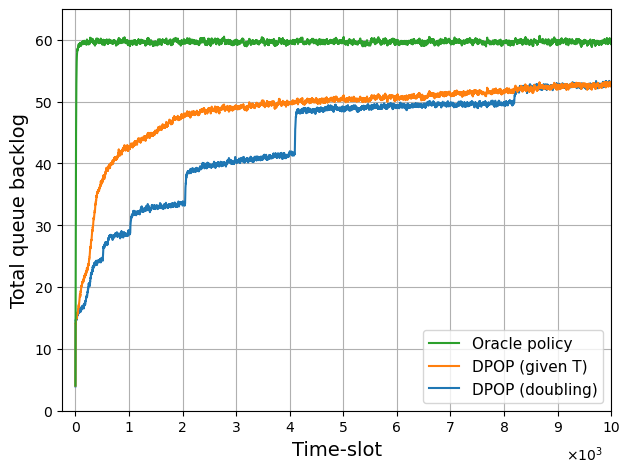

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.plot(unknownT_backlog_at_tt, color = 'C0', label = 'DPOP (doubling)')
plt.plot(knownT_backlog_at_tt, color = 'C1', label = 'DPOP (given T)')
plt.plot(oracle_backlog_at_tt, color = 'C2', label = 'Oracle policy')

plt.xticks(ticks=1000*np.arange(0,11), labels=['{:1.0f}'.format(s) for s in np.arange(0,11)])
plt.text(9150, -8, '$\\times 10^3$')

plt.xlim([-250,10000])
plt.ylim([0,65])

plt.xlabel('Time-slot')
plt.ylabel('Total queue backlog')

handles, labels = ax.get_legend_handles_labels()
order = [0,1,2]
order.reverse()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.grid()
plt.tight_layout()
plt.savefig('./results/figs/run-plots-backlog.eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


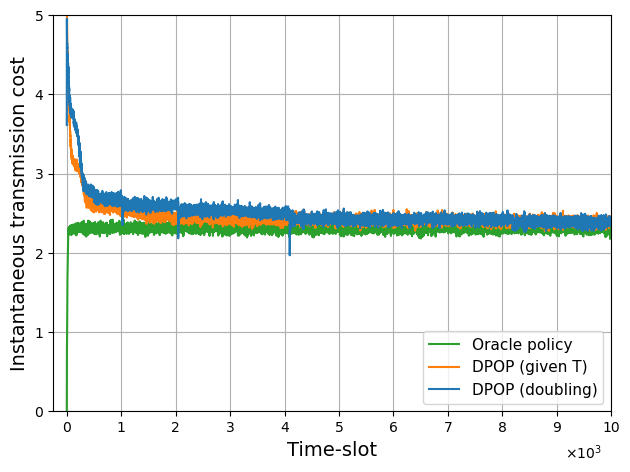

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.plot(oracle_tran_cost_at_tt, color = 'C2', label = 'Oracle policy')
plt.plot(knownT_tran_cost_at_tt, color = 'C1', label = 'DPOP (given T)')
plt.plot(unknownT_tran_cost_at_tt, color = 'C0', label = 'DPOP (doubling)')

plt.xticks(ticks=1000*np.arange(0,11), labels=['{:1.0f}'.format(s) for s in np.arange(0,11)])
plt.text(9150, -0.6, '$\\times 10^3$')

plt.xlim([-250,10000])
plt.ylim([0,5])

plt.xlabel('Time-slot')
plt.ylabel('Instantaneous transmission cost')

plt.legend(loc = 'lower right')

plt.grid()
plt.tight_layout()
plt.savefig('./results/figs/run-plots-cost.eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


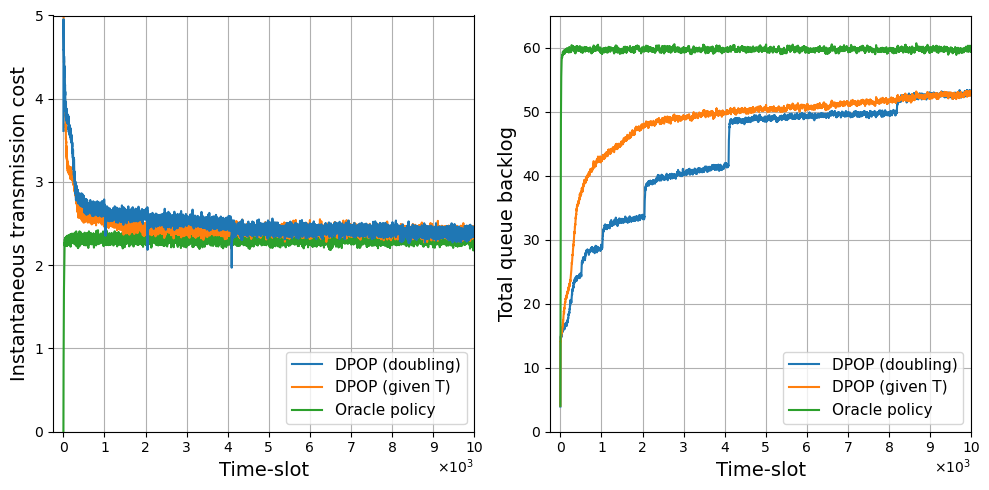

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax = axs[1]

ax.plot(unknownT_backlog_at_tt, color = 'C0', label = 'DPOP (doubling)')
ax.plot(knownT_backlog_at_tt, color = 'C1', label = 'DPOP (given T)')
ax.plot(oracle_backlog_at_tt, color = 'C2', label = 'Oracle policy')

# ax.ticklabel_format(axis='x', style='sci', scilimits=(0,4), useMathText=True)    
ax.set_xticks(ticks=1000*np.arange(0,11), labels=['{:1.0f}'.format(s) for s in np.arange(0,11)])
ax.text(9100, -6.5, '$\\times 10^3$')

ax.set_xlim([-250,10000])
ax.set_ylim([0,65])

ax.set_xlabel('Time-slot')
ax.set_ylabel('Total queue backlog')

# handles, labels = ax.get_legend_handles_labels()
# order = [0,1,2]
# order.reverse()
# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.legend()

ax.grid()

ax = axs[0]
ax.plot(oracle_tran_cost_at_tt, color = 'C2', label = 'Oracle policy')
ax.plot(knownT_tran_cost_at_tt, color = 'C1', label = 'DPOP (given T)')
ax.plot(unknownT_tran_cost_at_tt, color = 'C0', label = 'DPOP (doubling)')

# ax.ticklabel_format(axis='x', style='sci', scilimits=(0,4), useMathText=True)    
ax.set_xticks(ticks=1000*np.arange(0,11), labels=['{:1.0f}'.format(s) for s in np.arange(0,11)])
ax.text(9100, -0.5, '$\\times 10^3$')

ax.set_xlim([-250,10000])
ax.set_ylim([0,5])

ax.set_xlabel('Time-slot')
ax.set_ylabel('Instantaneous transmission cost')

handles, labels = ax.get_legend_handles_labels()
order = [0,1,2]
order.reverse()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'lower right')
# ax.legend(loc = 'lower right')

ax.grid()
plt.tight_layout()
plt.savefig('./results/figs/run-plots.eps', bbox_inches='tight')
plt.show()